# District 7 Housing
This project aims to conduct an in-depth data analysis of housing in District 7, which we initially considered to be ZIP code 02119, 02120, 02121, 02122, 02124, 02125, 02115, 02215, and 02118 because District 7 covers Dorchester, Roxbury, and part of Fenway and South End, and these zipcodes correspond to these neighbourhoods.

The project explores property trend, violation statistics, income-restricted housing needs, and other housing-related questions in District 7. At the end, we will perform comparative analysis between District 7 and Boston. If time permits, we will also compare District 7 to Massachusetts.

## 1. Understanding of Datasets

We gathered data to address several housing-related questions posed by the councilor. For instance, we used Boston Census data to determine the number of housing units—both owner-occupied and renter-occupied—providing a clearer view of the housing situation in District 7.

### 1.1 Income-Restricted Housing Inventory

We found data on income-restricted housing, which refers to units designated as affordable for lower-income individuals or families. While this mainly applies to rental units, there are also cases where purchasing restrictions are applied through affordable housing programs.

The councilor's questions focused on how the number of income-restricted units has changed over time, highlighting the growing difficulty people face in obtaining affordable housing and the need for government subsidies. We also addressed questions about Section 8 vouchers, a form of government assistance that helps low-income families, elderly individuals, and people with disabilities afford housing in the private market. Our analysis sought to determine how many units accept these vouchers, offering insight into the availability of subsidized housing.

##### Data Snapshot

In [5]:
import pandas as pd
import numpy as np

restricted_housing_df = pd.read_csv("https://raw.githubusercontent.com/BU-Spark/ds-bcc-tania-fernandes-d7/district7_teamB/fa24-team-b/housing/data/income_restricted/income_restricted_2022.csv")
restricted_housing_df.head(5)

,_id,Project_Name,Neighborhood,Zip Code,TtlProjUnits,RentUnits,OwnUnits,TtlMarket,MarketRent,MarketOwn,Total Income-Restricted,Income-Restricted Rental,Income-Restricted Ownership,Tenure,Public/ Private,Includes Senior Units?,Section 8
0,1,Abbot Street/ Shawmut Ave,Roxbury,2119.0,16,16,0,0.0,0.0,0.0,16,16,0.0,Rental,Private,NaN,NaN
1,2,Academy Homes I,Roxbury,2119.0,202,202,0,52.0,52.0,0.0,150,150,0.0,Rental,Private,NaN,NaN
2,3,Academy Homes II,Roxbury,2119.0,236,236,0,0.0,0.0,0.0,236,236,0.0,Rental,Private,NaN,Y
3,4,Adams Court Phase A,Mattapan,2126.0,50,50,0,0.0,0.0,0.0,50,50,0.0,Rental,Private,NaN,NaN
4,5,Adams Court Phase B,Mattapan,2126.0,45,45,0,0.0,0.0,0.0,45,45,0.0,Rental,Private,NaN,NaN


### 1.2 RentSmart

We utilized the RentSmart dataset for an in-depth analysis of inspectional services, which enforce building, housing, health, and environmental regulations to protect public health and safety. The dataset, ranging from 2016 to 2024, includes information such as violation types, addresses, neighborhoods, zip codes, and property characteristics (e.g., building and remodel years).

From this data, we can analyze how total violations and properties have changed over time, exploring correlations between them. Preliminary analysis indicates enforcement violations are the most common and have fluctuated significantly since 2020. Notably, households with three residents are the most prevalent across all areas in District 7. This allows us to identify which violations are under control and which require more attention, while considering the number of residents per household.

##### Data Snapshot

In [25]:
rentsmart_df = pd.read_csv("../data/rentsmart.csv")
rentsmart_df.head(5)

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year_built,year_remodeled,property_type,latitude,longitude,year
0,2024-10-02,Enforcement Violations,Improper storage trash: res,"1081-1083 Dorchester Ave, 02125",Dorchester,2125,1302139000,DORCHESTER FIRST REALTY TRUST,1905,2014,Residential 3-family,42.313779,-71.057314,2024
1,2024-10-02,Enforcement Violations,Improper storage trash: res,"6 Dawes Ter, 02125",Dorchester,2125,703977000,MADEK CHARLES V,1905,1970,Residential 3-family,42.318930,-71.060761,2024
2,2024-10-02,Enforcement Violations,Overfilling of barrel/dumpster,"7 Bakersfield St, 02125",Dorchester,2125,1301796000,CESCO LLC MASS LLC,1936,1981,Residential 7 or more units,42.317846,-71.060866,2024
3,2024-10-01,Enforcement Violations,Overgrown Weeds On Property,"27 Woodbine St, 02119",Roxbury,2119,1200848000,WHITE GILBERT G III,1890,2010,Residential 1-family,42.318880,-71.079861,2024
4,2024-10-01,Enforcement Violations,illegal parking prop owner 1,"2 Humboldt Ave, 02119",Roxbury,2119,1201598250,TWO HUMBOLDT AV CONDO TR,1999,1999,Condominium Main*,42.320570,-71.085741,2024


### 1.3 Boston Census

This comprehensive dataset contains detailed housing occupancy information, including the number of units per structure, the number of rooms, ownership status, and utilities. Using this data, we can examine housing density and distribution across District 7, compare it with other districts, and assess housing affordability and availability across neighborhoods. Additionally, we can study occupancy and ownership trends, as well as analyze neighborhood infrastructure and utility needs—valuable insights for future urban planning and development in District 7.

##### Data Snapshot

In [48]:
census_df = pd.read_csv("../data/census/ACSDP5Y2022.DP04-Data.csv")
census_df.head(5)

,GEO_ID,NAME,DP04_0001E,DP04_0001M,DP04_0002E,DP04_0002M,DP04_0003E,DP04_0003M,DP04_0004E,DP04_0004M,...,DP04_0139PM,DP04_0140PE,DP04_0140PM,DP04_0141PE,DP04_0141PM,DP04_0142PE,DP04_0142PM,DP04_0143PE,DP04_0143PM,Unnamed: 574
0,Geography,Geographic Area Name,Estimate!!HOUSING OCCUPANCY!!Total housing units,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,Estimate!!HOUSING OCCUPANCY!!Total housing uni...,Margin of Error!!HOUSING OCCUPANCY!!Total hous...,...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,Percent!!GROSS RENT AS A PERCENTAGE OF HOUSEHO...,Percent Margin of Error!!GROSS RENT AS A PERCE...,NaN
1,860Z200US02115,ZCTA5 02115,11282,593,9845,555,1437,296,3.6,3.8,...,2.5,11.4,2.8,9.5,2.4,49.0,5.2,(X),(X),NaN
2,860Z200US02116,ZCTA5 02116,14284,625,11915,581,2369,368,2.2,2.6,...,3.4,11.8,2.7,9.1,2.5,37.9,4.6,(X),(X),NaN
3,860Z200US02118,ZCTA5 02118,15502,674,14133,694,1369,290,1.2,1.2,...,2.1,16.1,3.5,11.1,2.3,40.1,4.2,(X),(X),NaN
4,860Z200US02119,ZCTA5 02119,12916,595,11823,612,1093,252,0.7,0.8,...,2.6,9.5,2.6,12.5,3.4,51.3,4.0,(X),(X),NaN


## 2. Data Cleaning and Preprocessing

### 2.1 Income-Restricted Housing Dataset

While cleaning the income-restricted housing dataset, we experimented with various methods before settling on the following approach:

- We dropped missing data points, as they accounted for less than 5% of the dataset.

- The ZIP code column initially contained floating-point numbers. We corrected this by converting the values to integers, then to strings, and finally added leading zeros for proper ZIP code formatting.

- We filtered the data by the ZIP codes associated with District 7's neighborhoods. Some ZIP codes were shared with neighborhoods outside the councilor's jurisdiction, so we further refined the dataset by cleaning and standardizing neighborhood names before filtering for the relevant ones.

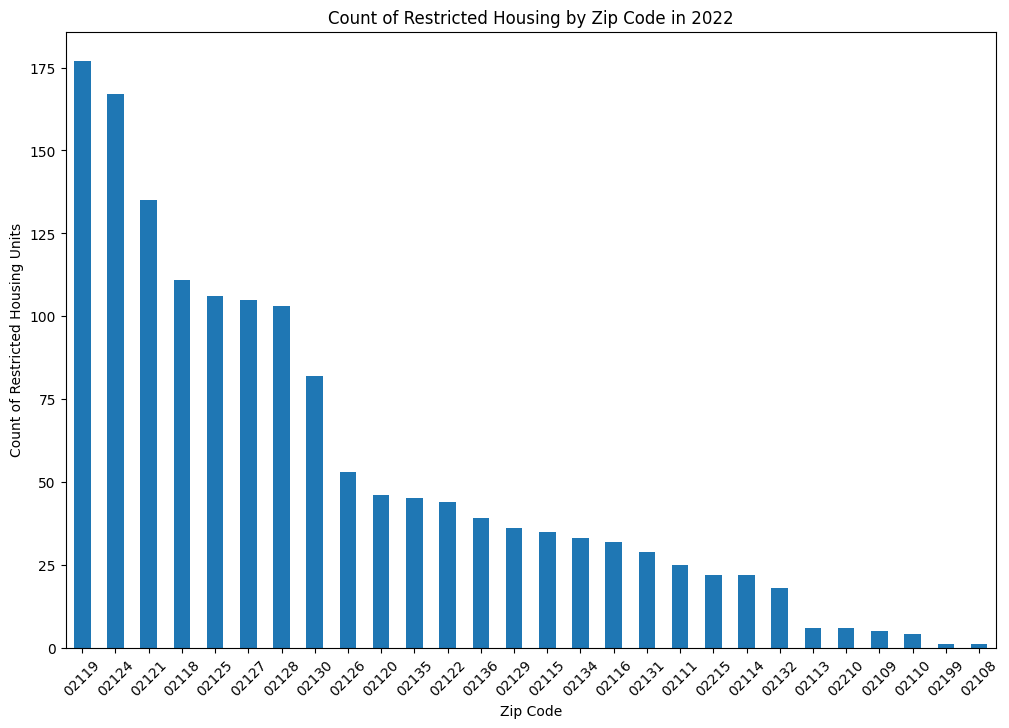

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

restricted_housing_df.dropna(subset=["Zip Code"], inplace=True)
restricted_housing_df["Zip Code"] = restricted_housing_df["Zip Code"].astype(int).astype(str).str.zfill(5)
restricted_housing_count_df = restricted_housing_df.groupby("Zip Code")["_id"].count().sort_values(ascending=False)
restricted_housing_count_df.plot(x="Zip Code", y="_id", kind="bar")

plt.title("Count of Restricted Housing by Zip Code in 2022")
plt.xlabel("Zip Code")
plt.ylabel("Count of Restricted Housing Units")

plt.xticks(rotation=45)
plt.show()

02119 and 02124 appears to have the most number of income restricted housing projects in this dataset in 2022.

For further details of our preliminary analysis of the income restricted housing dataset, please refer to this [notebook](https://github.com/BU-Spark/ds-bcc-tania-fernandes-d7/blob/district7_teamB/fa24-team-b/housing/notebooks/income_restricted_housing/income_restricted_housing.ipynb).

### 2.2 RentSmart Dataset

To clean the RentSmart dataset, we applied the following steps:

- The date column included unnecessary time information, so we removed the hours, minutes, and seconds, retaining only the year, month, and day.

- In the description column, we grouped similar violation descriptions. For example, "Work without permit" and "Work w/o Permit" were merged into "Work Without Permit."

- ZIP codes were missing leading zeros, and the year-built and year-remodeled columns contained extraneous ".0" values, so we reformatted them accordingly.

- We filtered the data by ZIP code and neighborhood, following the same approach used for the income-restricted housing dataset to ensure that only District 7 data was included.

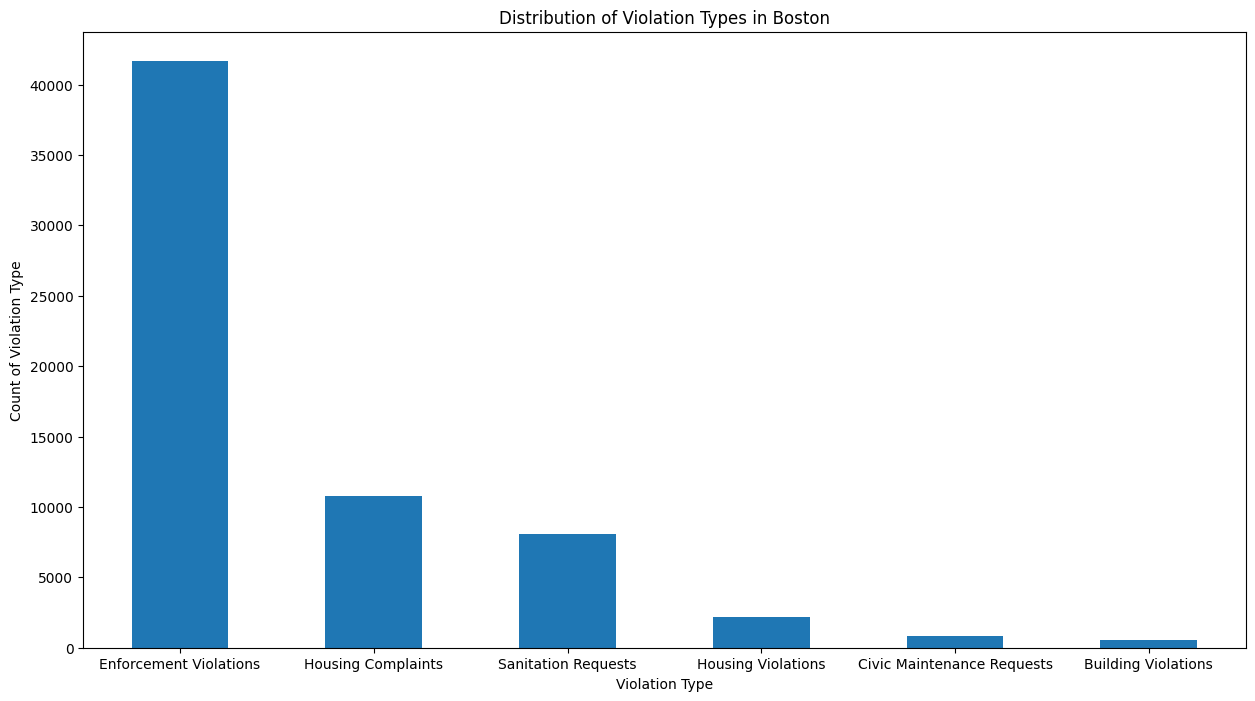

In [34]:
plt.figure(figsize=(15,8))

rentsmart_count_df = rentsmart_df.groupby("violation_type")["address"].count().sort_values(ascending=False)
rentsmart_count_df.plot(x="violation_type", y="address", kind="bar")

plt.title("Distribution of Violation Types in Boston")
plt.xlabel("Violation Type")
plt.ylabel("Count of Violation Type")

plt.xticks(rotation=0)
plt.show()

Enforcement violation is the most common type of violations Boston City-wide.

For further details of our preliminary analysis of the RentSmart dataset, please refer to this [notebook](https://github.com/BU-Spark/ds-bcc-tania-fernandes-d7/blob/district7_teamB/fa24-team-b/housing/notebooks/d7-rentsmart.ipynb).

### 2.3 Boston Census Dataset

In our initial preprocessing of the Boston Census dataset, we took the following steps:

- We selected the relevant ZIP codes for District 7 and downloaded housing data for the years 2011 to 2022. Although we expected a single dataset, we received 12 datasets (one per year), each containing over 500 columns.

- Each dataset had 4 sub-columns for each primary column: estimates, margins of error, percentages, and percentage margins of error. For preprocessing, we focused on the estimate and percentage columns.

- The column names were complex and difficult to interpret. For example, the column for the estimated total number of housing units was labeled "Estimate!!HOUSING OCCUPANCY!!Total housing units." We are working on cleaning these column names to make them more readable and consistent across datasets.

- We aim to consolidate the data from multiple years into a single dataset for year-by-year comparisons across ZIP codes.

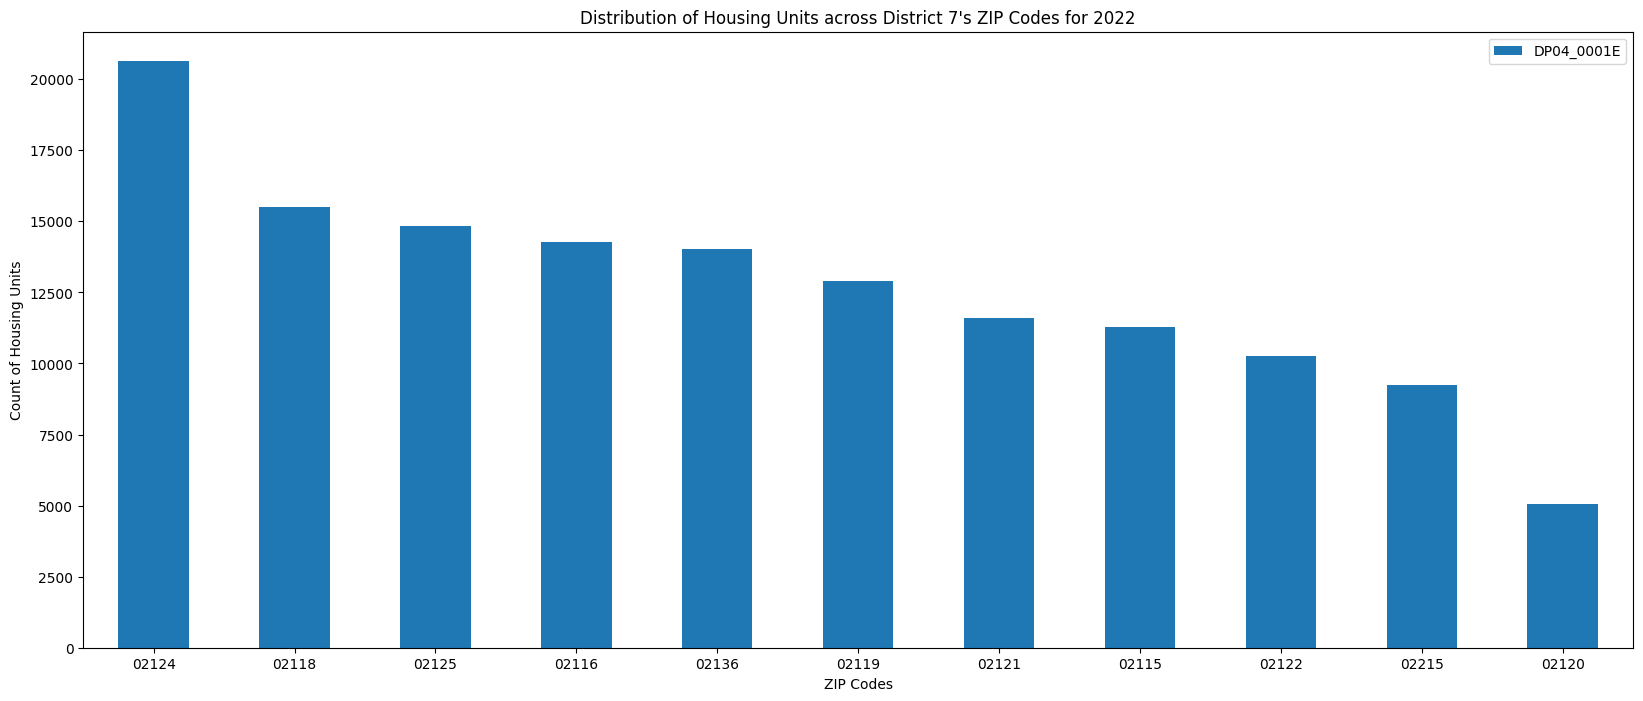

In [61]:
plt.figure(figsize=(20,8))

census_count_df = census_df[1:][["NAME","DP04_0001E"]]
census_count_df["NAME"] = census_count_df["NAME"].str[6:]
census_count_df["DP04_0001E"] = census_count_df["DP04_0001E"].astype(int)
ax = census_count_df.sort_values(ascending=False, by="DP04_0001E").plot(x="NAME", y="DP04_0001E", kind="bar", ax=plt.gca())

plt.title("Distribution of Housing Units across District 7's ZIP Codes for 2022")
plt.xlabel("ZIP Codes")
plt.ylabel("Count of Housing Units")

plt.xticks(rotation=0)
plt.show()

02124 and 02118 appears to have the most housing units. 02124 also have a very high number of income-restricted housings.

For further details of our preliminary analysis of the RentSmart dataset, please refer to this [notebook](https://github.com/BU-Spark/ds-bcc-tania-fernandes-d7/blob/district7_teamB/fa24-team-b/housing/notebooks/d7-CensusData.ipynb).

## 3. Challenges

### 3.1 District 7 Jurisdiction

We faced challenges determining which projects from the income-restricted housing dataset are in District 7, as the dataset identifies areas by neighborhood rather than district. For projects in the South End, we suspect that the provided ZIP codes may be incorrect, as multiple ZIP codes are listed when the South End should only have one.

We consulted the research guide librarian, Lucy Flamm, who recommended using the "Find My Councilor" tool to clarify which addresses in the South End belong to District 7. For addresses that cannot be verified through this tool, we will compare them with the Massachusetts Interactive Property Map and Boston's precinct map. This process will only apply to projects in the South End, making it feasible to handle manually.

A CSV file containing only income-restricted housing projects in District 7 is now available on GitHub, but it hasn't been used in the current data cleaning and preprocessing due to the time required for manual verification. We plan to incorporate this dataset into future analyses.

**Update:** The client comments that he is most interested in Zip Code 02199 and 02121 since these are the zip codes that wholely fall within District 7 and makes up the majority of District 7. We are in the process of confirming with the client if this is truely what he wants because this will filter out a lot of data from the income-restricted housing dataset.

## 4. Insufficient Data

Determining whether a South End address is part of District 7 remains challenging, particularly for larger datasets like RentSmart, which cannot be manually processed. We are considering reaching out to Boston’s city data team for assistance, as Lucy Flamm suggested, in case they have privately stored data that could help us.